# Find good settings for alignment

Purpose: Find new settings for alignment that work well for a new chroma grid sample. As long as nothing changes with the imager (RGB/hyperspectral camera settings or positions) this is not needed, as we can just continue using the same homography matrix for alignment.

Outputs will be saved inside of the `test_alignment` folder, in a subfolder with the prefix `output_` followed by today's date. These outputs need to be manually inspected to identify good settings. In the future, this can be automated with a simple loss function.

## First, let's learn how to identify good or bad alignments.

See below nine bad alignments. Sometimes they look completely crazy and warped. Sometimes the lines are only a little bit off, and appear as shadows.<br>
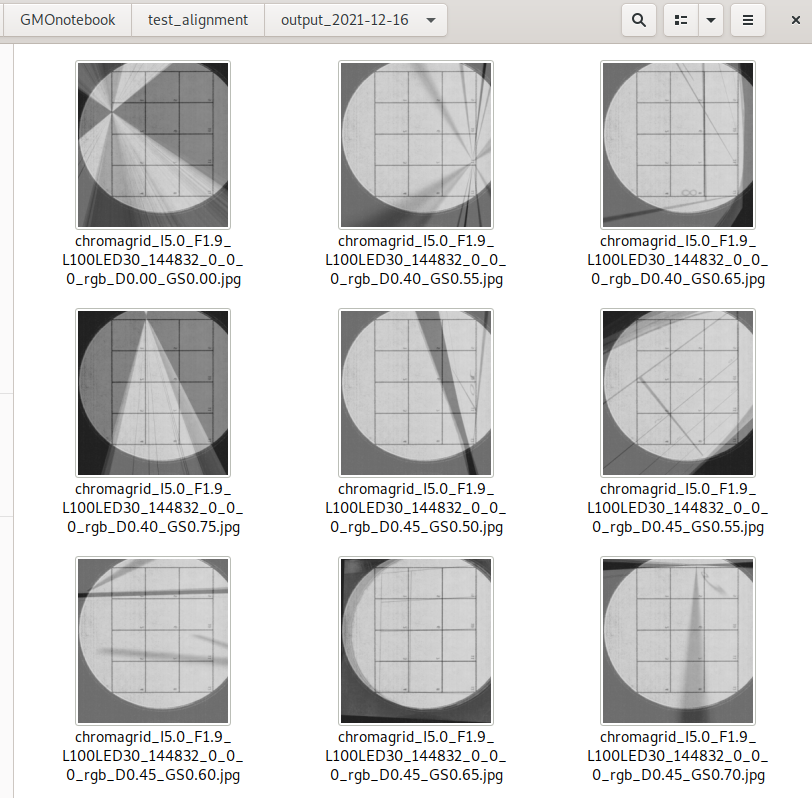

See below a great alignment. The RGB and hyperspectral layers appear as a single aligned image, with no shadows or warping of grid lines.<br>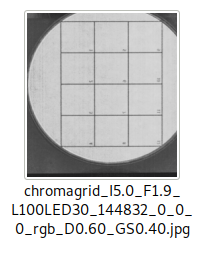

The parameters are in the file name. In this case, the `distance` parameter is 0.60 and the `gaussian_sigma` parameter is 0.40. Enter these parameters into the `GMOdetector` Jupyter notebook and run `Automatic` mode to use the resulting alignment.

Now to run the code to generate a new alignment....

## Set these two paths to locations for chroma grid images (hyperspectral and RGB)

In [3]:
chroma_grid_hdr_path=/media/michael/Elements_13//GWAS_CRISPR/CRIA/wk3_stem_only/chromagrid_I5.0_F1.9_L100LED30_144832_0_0_0_Fluorescence.hdr

In [4]:
chroma_grid_jpg_path=/media/michael/Elements_13//GWAS_CRISPR/CRIA/wk3_stem_only/chromagrid_I5.0_F1.9_L100LED30_144832_0_0_0_rgb.jpg

## This code doesn't need to change.

Simply run this code after updating the two variables above.

In [2]:
cwd=$(pwd)

In [5]:
alignment_module_path=/home/michael/ImageAlignment/

In [7]:
conda activate test-environment
cd $alignment_module_path
python hypercube_to_csv.py \
$chroma_grid_hdr_path \
700 \
130 \
"hypercube_to_csv.csv" \
"hypercube_to_csv.jpg"
conda deactivate

(test-environment) (test-environment) Reading hyperspectral image /media/michael/Elements_13//GWAS_CRISPR/CRIA/wk3_stem_only/chromagrid_I5.0_F1.9_L100LED30_144832_0_0_0_Fluorescence.hdr
/home/michael/anaconda3/envs/test-environment/lib/python3.7/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
Extracting channel at index 130
Writing channel matrix to hypercube_to_csv.csv
Making image for inspection and writing to hypercube_to_csv.jpg
(test-environment) 

In [6]:
date=$(date '+%Y-%m-%d')

In [7]:
echo $date

2021-12-16


In [8]:
mkdir output_${date}/

mkdir: cannot create directory ‘output_2021-12-16/’: File exists


: 1

In [9]:
conda activate alignment
cd $alignment_module_path

for distance in $(seq 0 0.05 1); do
    echo "distance: $distance"
    for gaussian_sigma in $(seq 0 0.05 1); do
        echo "gaussian_sigma: $gaussian_sigma"
        chroma_grid_jpg_path_basename=$(basename -- $chroma_grid_jpg_path)
        aligned_grid_name_initial=$(echo $chroma_grid_jpg_path_basename | sed 's/rgb/rgb_aligned/g')
        aligned_grid_name_prefix=$(echo $chroma_grid_jpg_path_basename | sed 's/.jpg//g') 
        aligned_grid_name_wdetail=${aligned_grid_name_prefix}_D${distance}_GS${gaussian_sigma}.jpg
        aligned_grid_original_position=${alignment_module_path}output/$aligned_grid_name_initial

        python main.py \
        --hyper-img "hypercube_to_csv.csv" \
        --rgb-img $chroma_grid_jpg_path \
        --mode 1 \
        --image_thresh_high=120 \
        --image_thresh_low=50 \
        --distance=$distance \
        --gaussian_sigma=$gaussian_sigma

        mv $aligned_grid_original_position ${cwd}/output_${date}/$aligned_grid_name_wdetail
        echo " "
    done
done

conda deactivate

(alignment) (alignment) (alignment) distance: 0.00
gaussian_sigma: 0.00
------------Preprocess is saved and finished.-------------------
Traceback (most recent call last):
  File "main.py", line 219, in <module>
    main(args)
  File "main.py", line 196, in main
    align_img, unalign_img, warped_rgb, homography = utils.align_image(hyp_img, rgb_img, args.distance, args.ch, args.image_thresh_low, args.image_thresh_high, args.gaussian_sigma)
  File "/home/michael/ImageAlignment/utils.py", line 255, in align_image
    kpts1, descs1 = sift.detectAndCompute(hyp_gray, None)
cv2.error: OpenCV(4.5.4) /tmp/pip-req-build-3129w7z7/opencv/modules/imgproc/src/smooth.dispatch.cpp:293: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'createGaussianKernels'

 
gaussian_sigma: 0.05
------------Preprocess is saved and finished.-------------------
No of matches are less than 4. Cannot run RANSAC
mv: cannot stat '/home/michael

In [ ]:
python main.py \
--hyper-img "hypercube_to_csv.csv" \
--rgb-img $chroma_grid_jpg_path \
--mode 1 \
--image_thresh_high=120 \
--image_thresh_low=50 \
--distance=$distance \
--gaussian_sigma=$gaussian_sigma